#### 2020.06.17


## Dataset: AIBL

### Analyses

An analysis is performed with the use of NiftyNet software. The .ini file with all settigs was provided by ASL (nn_demo.ini). The following analysis were performed:

|     |     |     |     |
| :-: | :-: | :-: | :-: |
| Examination name    | Image              | Mask                          |  lr   |
| 01_AIBL_FSL_biascorr | T1_biascorr.nii.gz | T1_biascorr_brain_mask.nii.gz |0.001  |
| 02_AIBL_FSL_biascorr | T1_biascorr.nii.gz | T1_biascorr_brain_mask.nii.gz |0.0015 |
| 03_AIBL_FSL_biascorr | T1_biascorr.nii.gz | T1_biascorr_brain_mask.nii.gz | 0.002 |
                      |                    |                               |       |
| 04_AIBL_FSL_T1       | T1.nii.gz          | T1_biascorr_brain_mask.nii.gz |0.001  |
| 05_AIBL_FSL_T1       | T1.nii.gz          | T1_biascorr_brain_mask.nii.gz |0.0015 |
| 06_AIBL_FSL_T1       | T1.nii.gz          | T1_biascorr_brain_mask.nii.gz | 0.002 |

In [1]:
import pandas as pd
from fastai.utils.mem import *
import matplotlib.pyplot as plt

#from pathlib import Path

#### Some constants, pths, ...

In [2]:
data_set = 'AIBL'
main_path = Path(f'/data-10tb/marek/{data_set}/NiftyNet/')

description_file = main_path / f'{data_set}_description.txt'

evaluation_mean = 'eval_label.csv'
evaluation_all = 'eval_subject_id_label.csv'

### Load experiment description from a file

In [7]:
#!cat '/data-10tb/marek/IXI/NiftyNet/IXI_description.txt'

In [18]:
description = pd.read_csv(description_file, header=None, delim_whitespace=True)
description.columns = ["Id", "Experiment name", "Learning rate", "Finished", 'Date']
description.iloc[:,:3]

Id       Experiment name Learning rate
0  1.0  01_AIBL_FSL_biascorr      lr=0.001
1  2.0  02_AIBL_FSL_biascorr     lr=0.0015
2  3.0  03_AIBL_FSL_biascorr      lr=0.002
3  4.0        04_AIBL_FSL_T1      lr=0.001
4  5.0        05_AIBL_FSL_T1     lr=0.0015
5  6.0        06_AIBL_FSL_T1      lr=0.002

#### Experiments

In [19]:
# # experiment name list
# experiments = Path(f'{main_path}/model/').ls()

# experiments.sort()
# experiments = [e.parts[-1] for e in experiments]
# _ = [print(f'{k} ---> {e}') for k,e in enumerate(experiments)]b

In [21]:
experiments = description.iloc[:,1:3]
#experiments

### Main function(s)

In [22]:
def wrap_text(text):
    k = len(text)
    print((k+8) * '*')
    print(f'*** {text} ***')
    print((k+8) * '*')

In [23]:
def plot_stats(experiment, show='DJHS'):
    """
    Plot Selection:
    D - Dice
    J - Jaccard
    H - Hausdorff_distance
    S - stat table
    """
    
    exper, lr_str = experiment
    lr = float(lr_str.split('=')[-1])
    
    
        
    wrap_text(f'Experiment {exper}')

    evaluation_folder = Path(f'{main_path}/model/{exper}/evaluations/')
    
    # Load evaluation file for all inference images
    df_all = pd.read_csv(evaluation_folder / evaluation_all)
    #df_all.head(3)
    
    # Data frame for Dice, Hausdorff distance and Jaccard coefficient statistics
    dct = {'dice':[df_all.dice.mean(), df_all.dice.std()],
       'hausdorff_distance':[df_all.hausdorff_distance.mean(), df_all.hausdorff_distance.std()],
       'jaccard':[df_all.jaccard.mean(), df_all.jaccard.std()], 'lr':[lr,lr]}
    df_stat = pd.DataFrame(dct, index=['mean', 'std'])
    if 'S' in show:
        print(df_stat)
        print(2*'\n')
    
    ##################
    ###  plot Dice ###
    ##################
    if 'D' in show:
        y1 = df_all.dice
        x = range(len(y1))

        labels = df_all.subject_id
        yerr = df_all.dice.std()

        plt.figure(figsize=(16,5))
        plt.errorbar(x, y1, yerr=yerr)
        plt.grid()
        p = plt.xticks(x, labels, rotation='vertical')
        _ = plt.title(f'{exper}, {lr};   Dice:  mean={df_stat.dice[0]:.3f}, std={df_stat.dice[1]:.4f}',
                  fontsize=18, fontweight='bold')
    
    ####################
    ### plot Jaccard ###
    ####################
    if 'J' in show:
        y2 = df_all.jaccard
        x = range(len(y2))

        labels = df_all.subject_id
        yerr = df_all.jaccard.std()

        plt.figure(figsize=(16,5))
        plt.errorbar(x, y2, yerr=yerr)
        plt.grid()
        p = plt.xticks(x, labels, rotation='vertical')
        _ = plt.title(f'{exper}; {lr};   Jaccard: mean={df_stat.jaccard[0]:.3f},\
            std={df_stat.jaccard[1]:.4f}',
                  fontsize=18, fontweight='bold')
    
    ###############################
    ### plot Hausdorff_distance ###
    ###############################
    if 'H' in show:
        y3 = df_all.hausdorff_distance
        x = range(len(y3))

        labels = df_all.subject_id
        yerr = df_all.hausdorff_distance.std()

        plt.figure(figsize=(16,5))
        plt.errorbar(x, y3, yerr=yerr)
        plt.grid()
        p = plt.xticks(x, labels, rotation='vertical')
        _ = plt.title(f'{exper}; {lr};   Hausdorff distance: mean={df_stat.hausdorff_distance[0]:.3f}\
                std={df_stat.hausdorff_distance[1]:.4f}', \
                  fontsize=18, fontweight='bold')
    return df_stat

### 01_AIBL_FSL_biascorr

***************************************
*** Experiment 01_AIBL_FSL_biascorr ***
***************************************
          dice  hausdorff_distance   jaccard     lr
mean  0.937573           25.434301  0.883463  0.001
std   0.025043           13.979167  0.042213  0.001





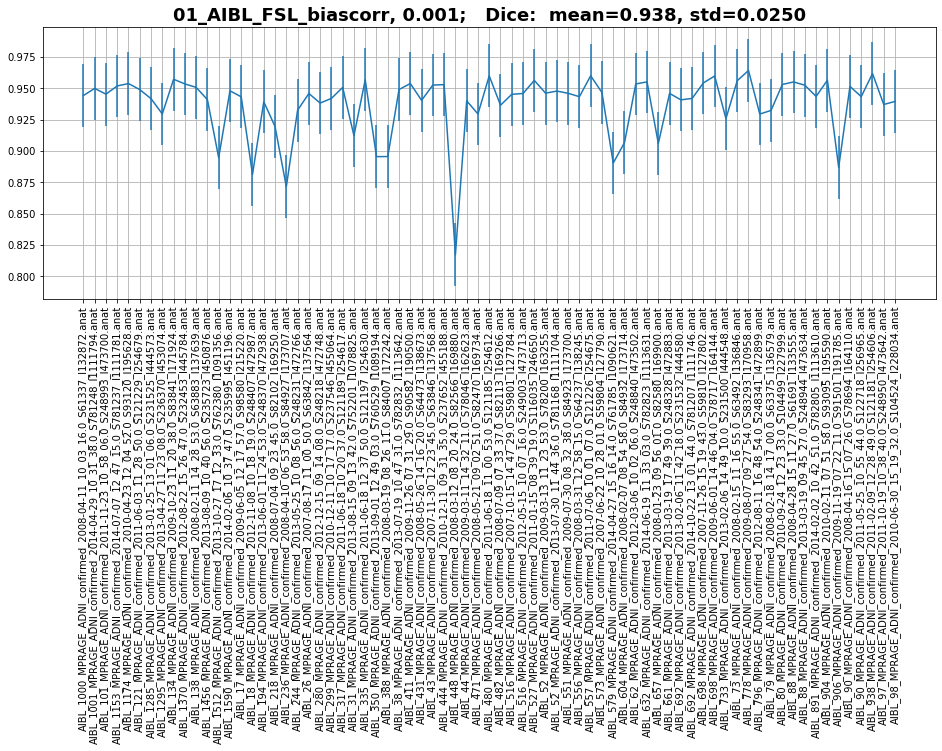

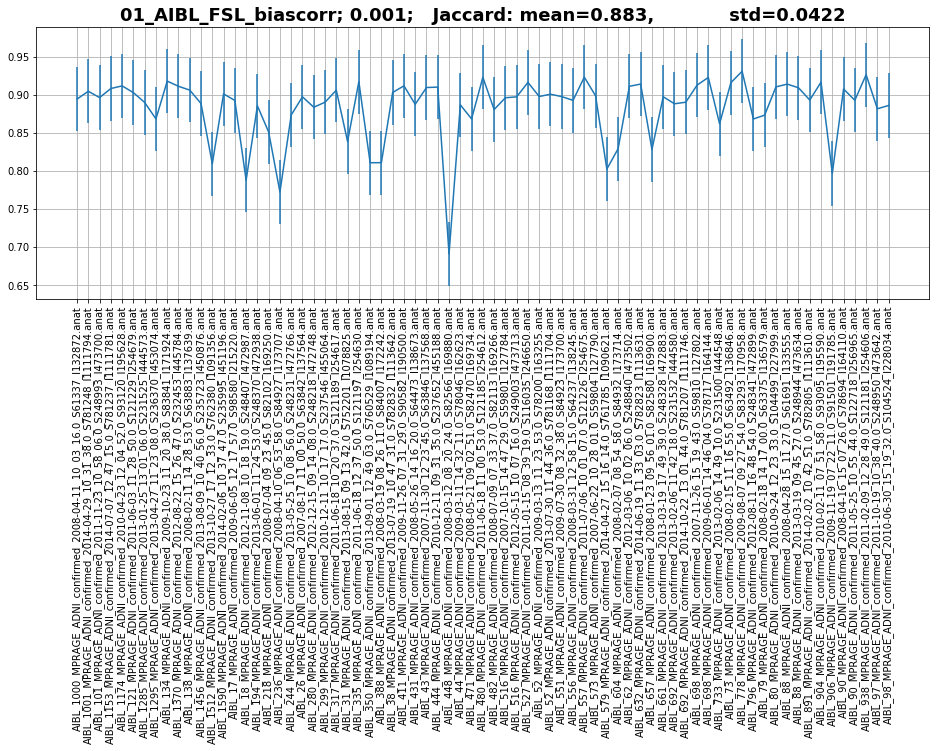

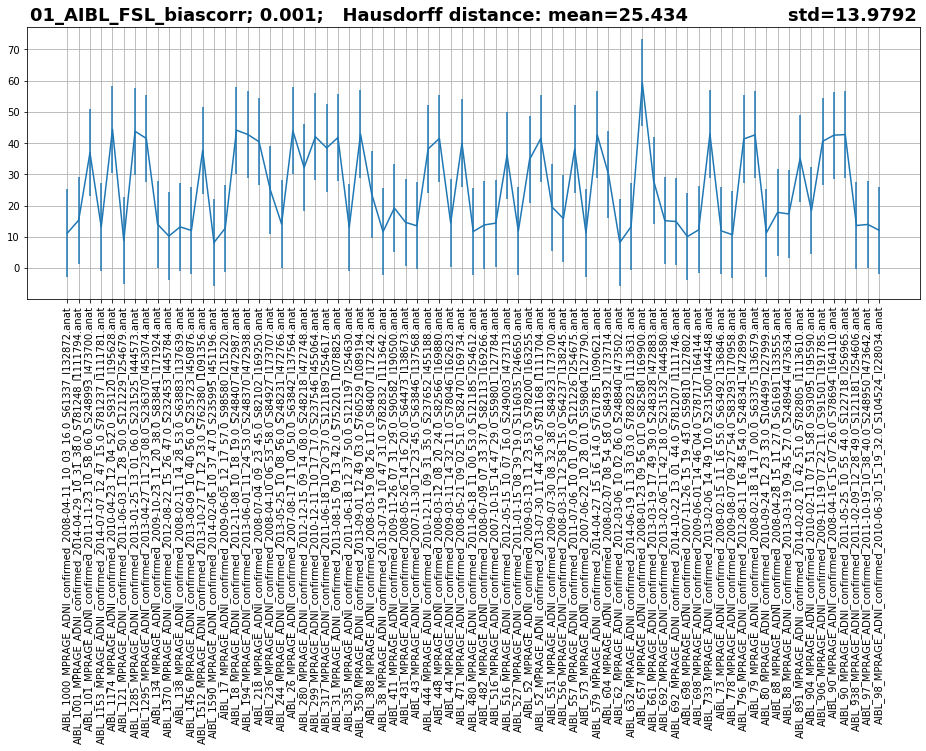

In [24]:
stat1 = plot_stats(experiments.loc[0])

### 02_AIBL_FSL_biascorr

***************************************
*** Experiment 02_AIBL_FSL_biascorr ***
***************************************
          dice  hausdorff_distance   jaccard      lr
mean  0.953677           23.424776  0.911574  0.0015
std   0.008337           14.955689  0.015056  0.0015





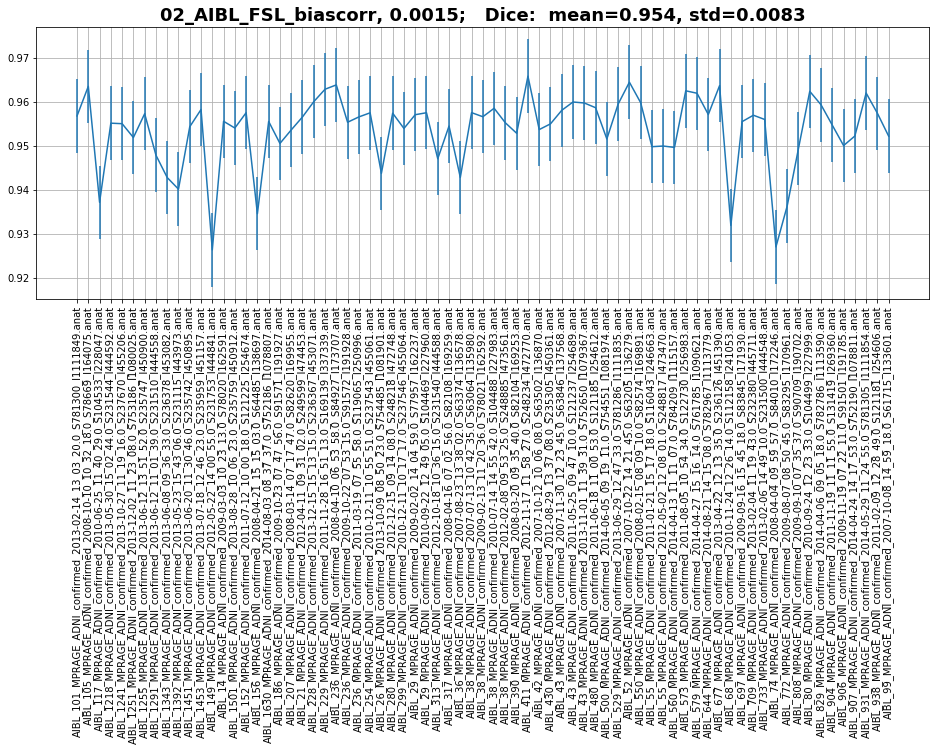

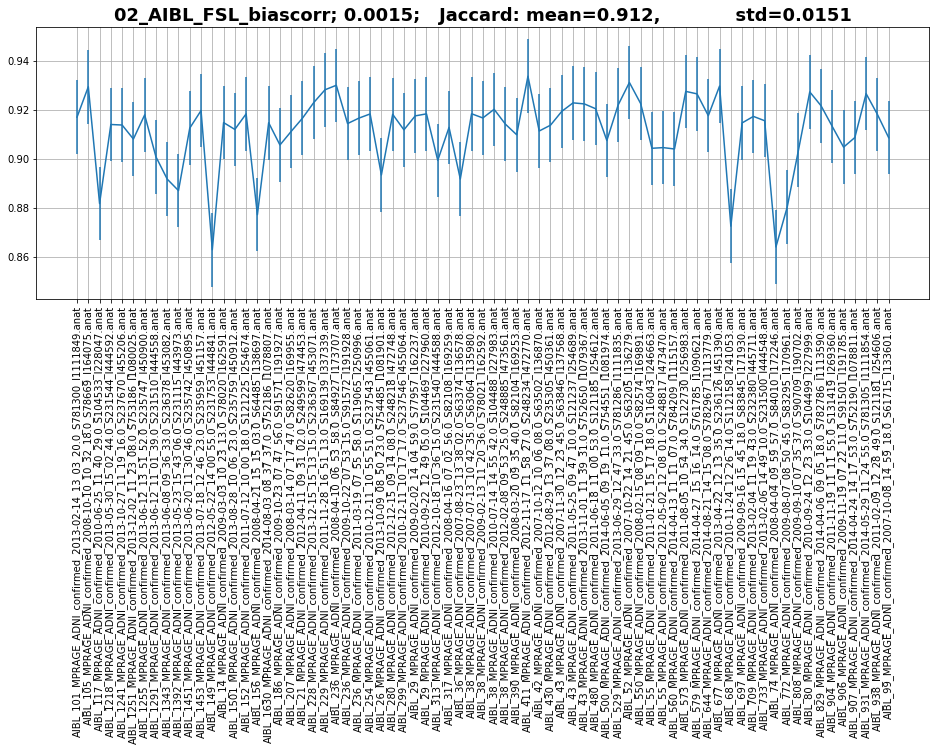

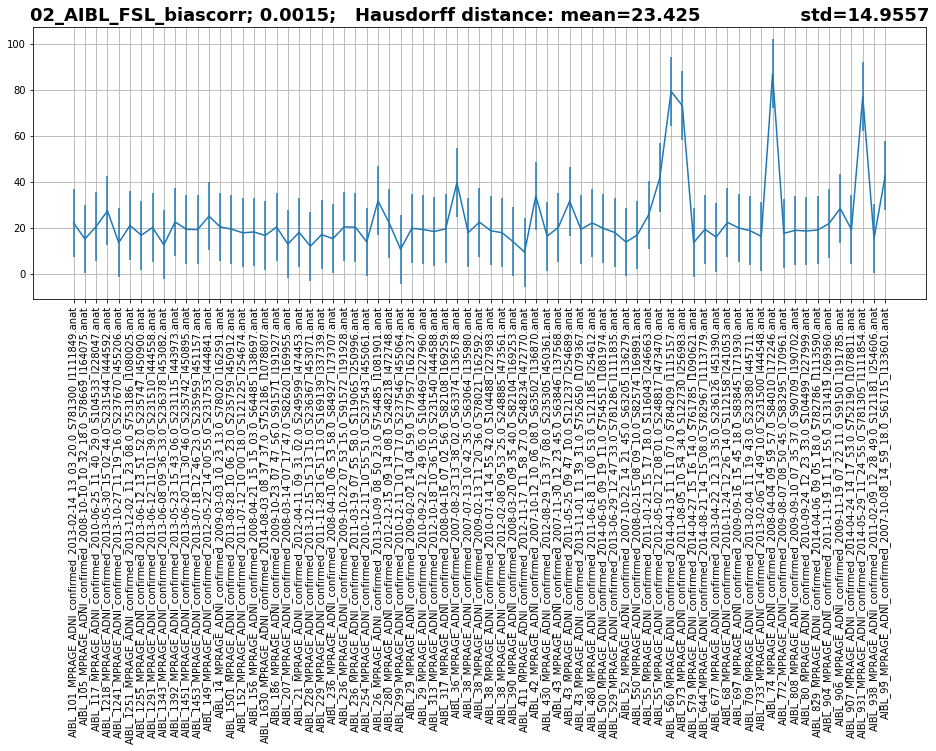

In [25]:
stat2 = plot_stats(experiments.loc[1])

### 03_AIBL_FSL_biascorr

***************************************
*** Experiment 03_AIBL_FSL_biascorr ***
***************************************
          dice  hausdorff_distance  jaccard     lr
mean  0.940755           33.176858  0.88855  0.002
std   0.015880           19.076095  0.02789  0.002





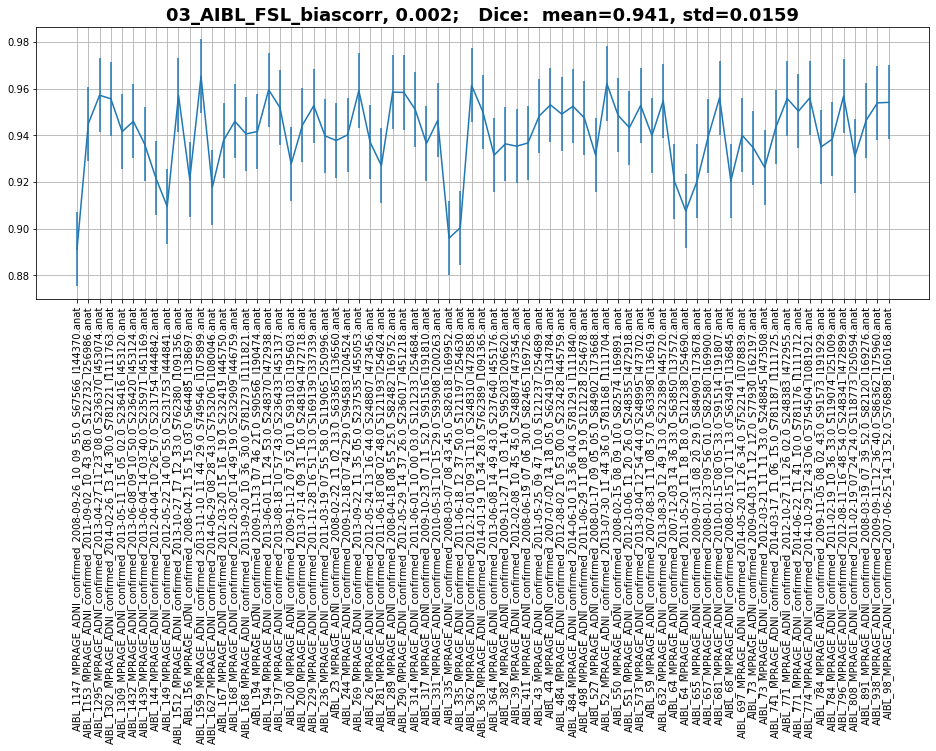

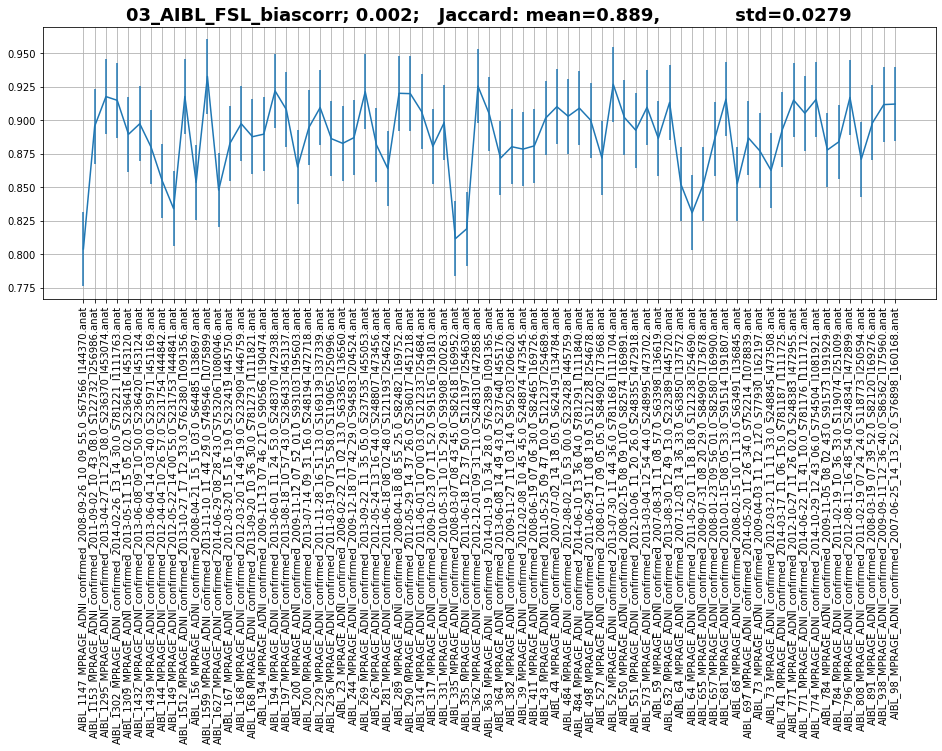

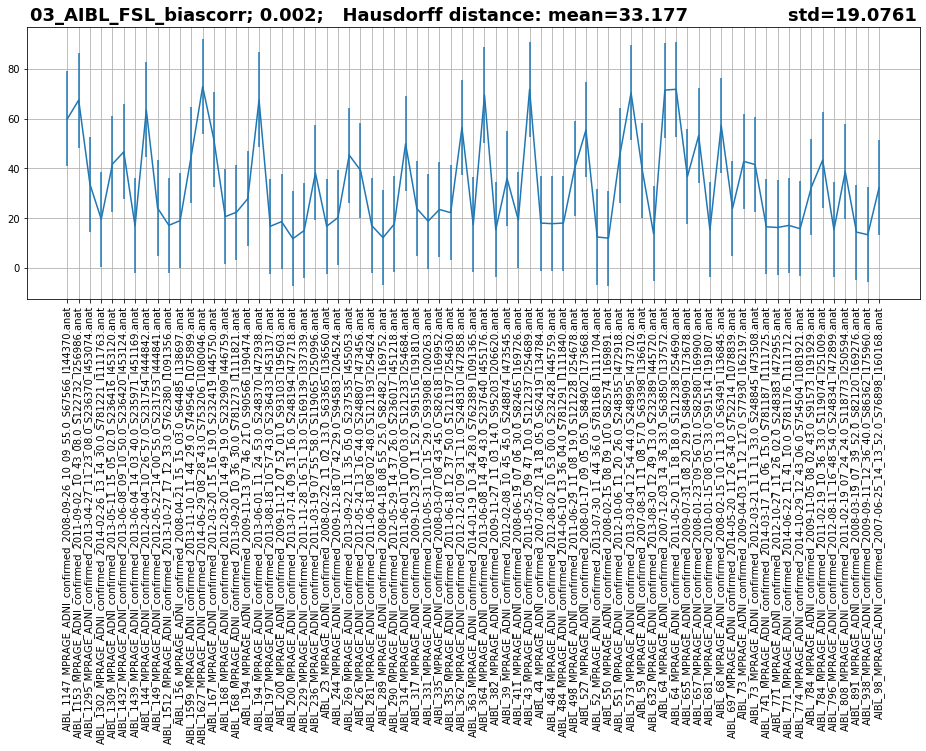

In [26]:
stat3 = plot_stats(experiments.loc[2])

### 04_AIBL_FSL_T1

*********************************
*** Experiment 04_AIBL_FSL_T1 ***
*********************************
         dice  hausdorff_distance   jaccard     lr
mean  0.95773           16.401596  0.919172  0.001
std   0.01302           11.994269  0.022971  0.001





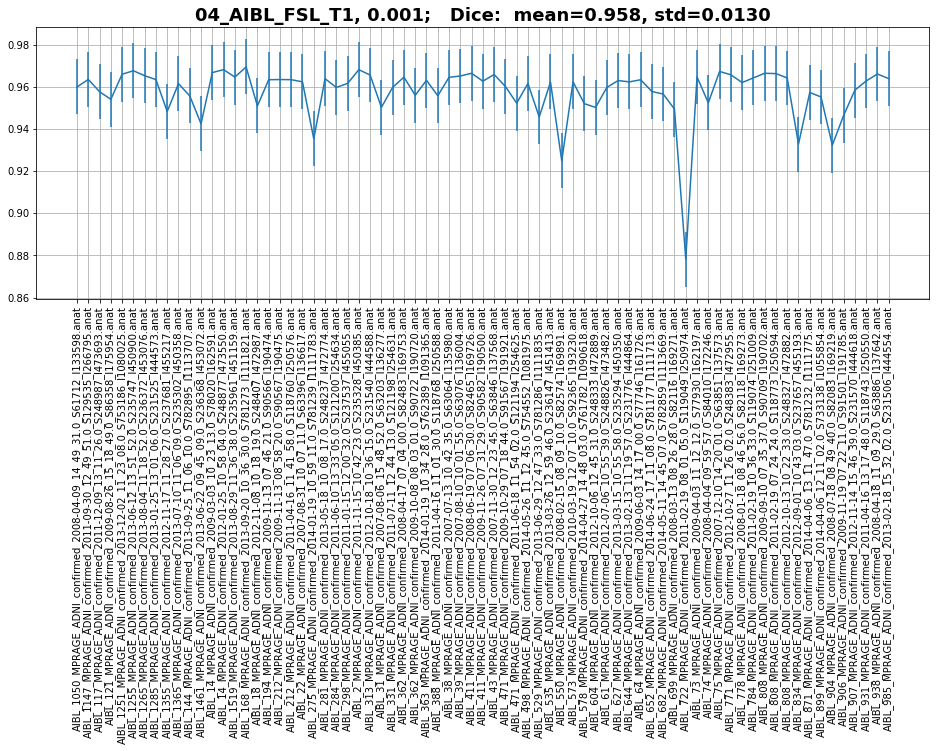

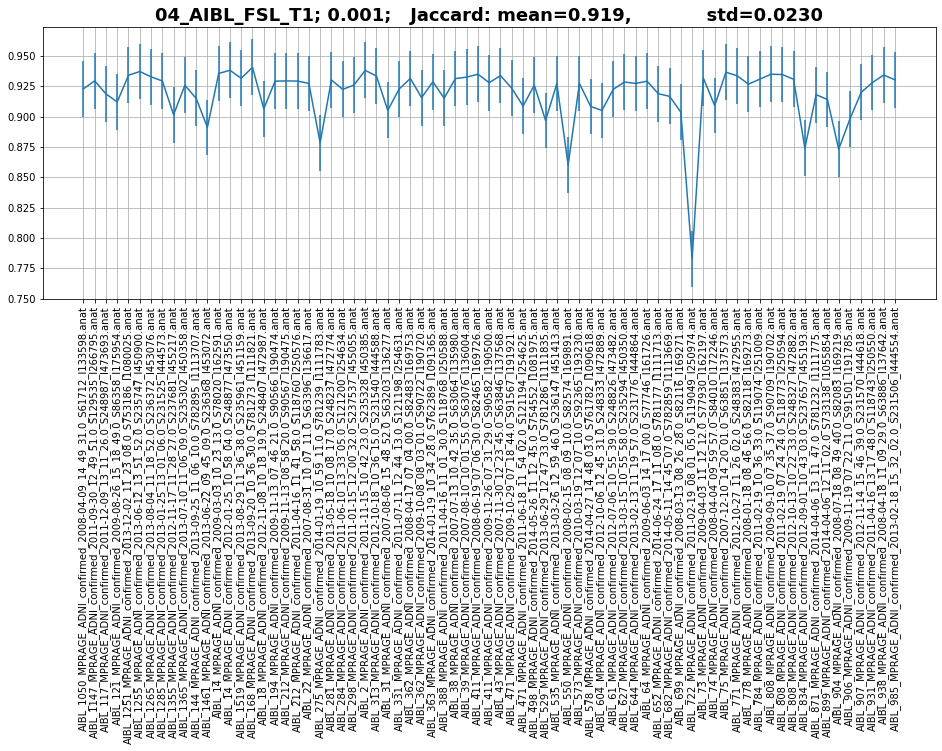

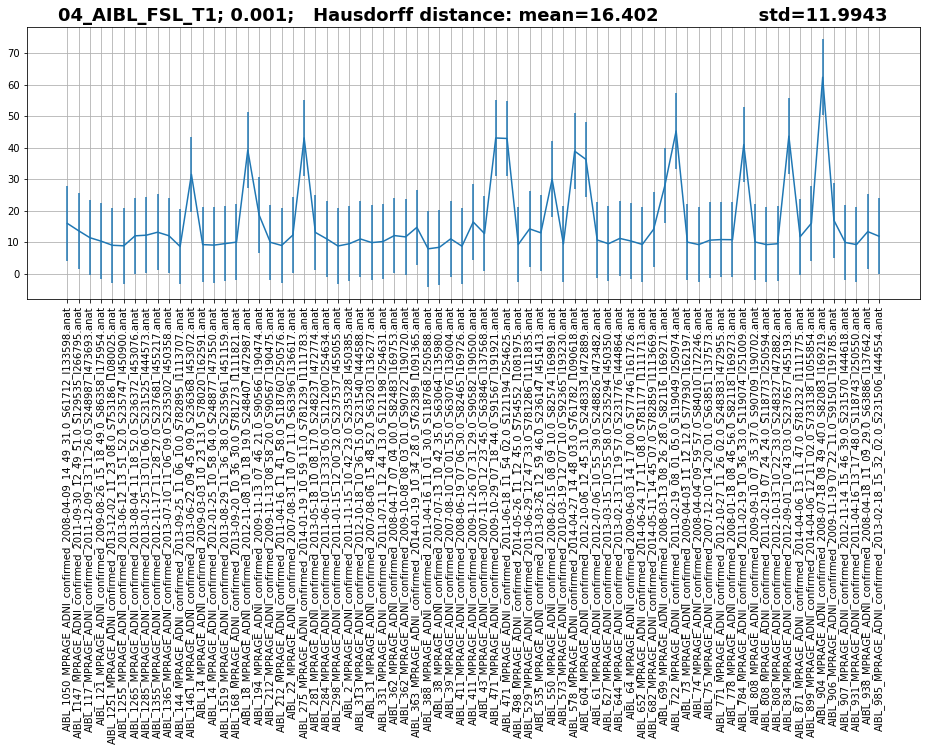

In [27]:
stat4 = plot_stats(experiments.loc[3])

### 05_AIBL_FSL_T1

*********************************
*** Experiment 05_AIBL_FSL_T1 ***
*********************************
          dice  hausdorff_distance   jaccard      lr
mean  0.948222           41.253381  0.902524  0.0015
std   0.024689           10.248695  0.042431  0.0015





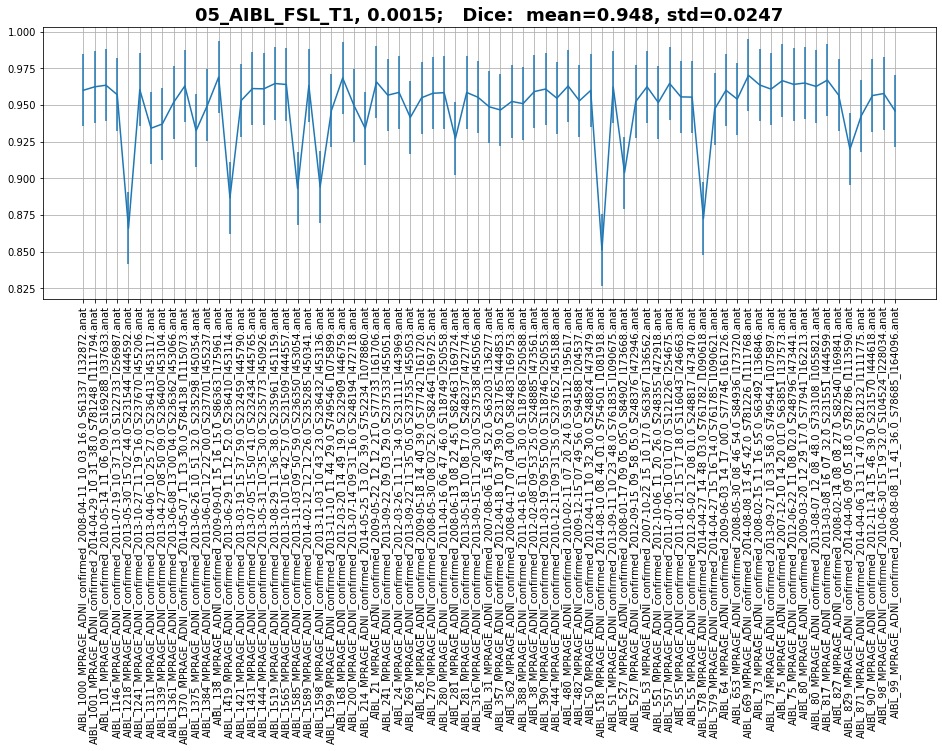

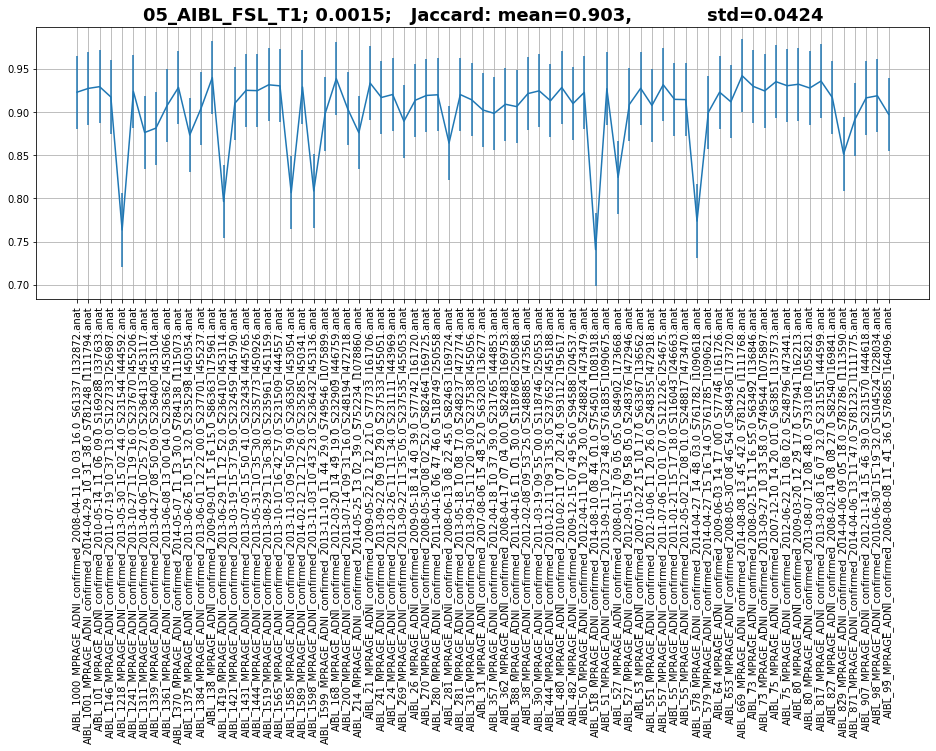

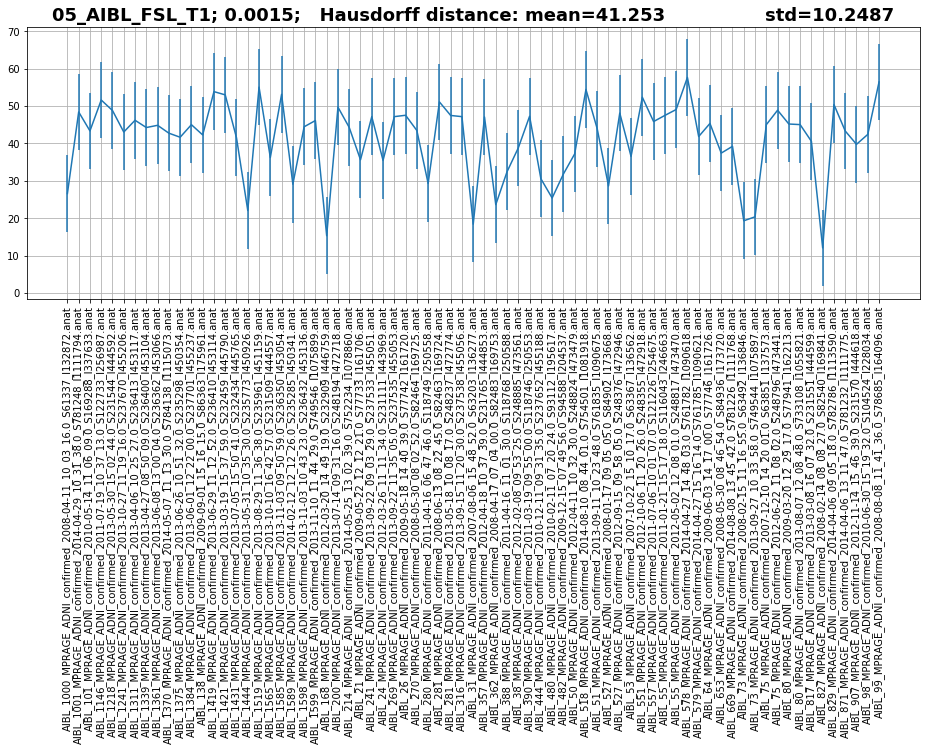

In [28]:
stat5 = plot_stats(experiments.loc[4])

### 06_AIBL_FSL_T1

*********************************
*** Experiment 06_AIBL_FSL_T1 ***
*********************************
          dice  hausdorff_distance   jaccard     lr
mean  0.957147           18.501298  0.918039  0.002
std   0.011476           14.514000  0.020541  0.002





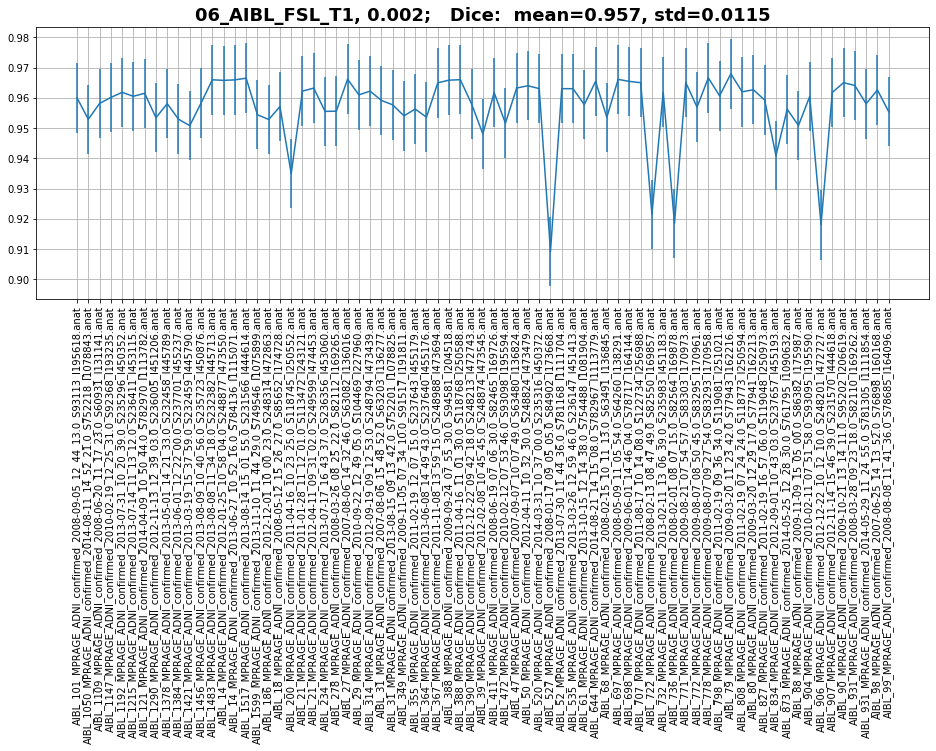

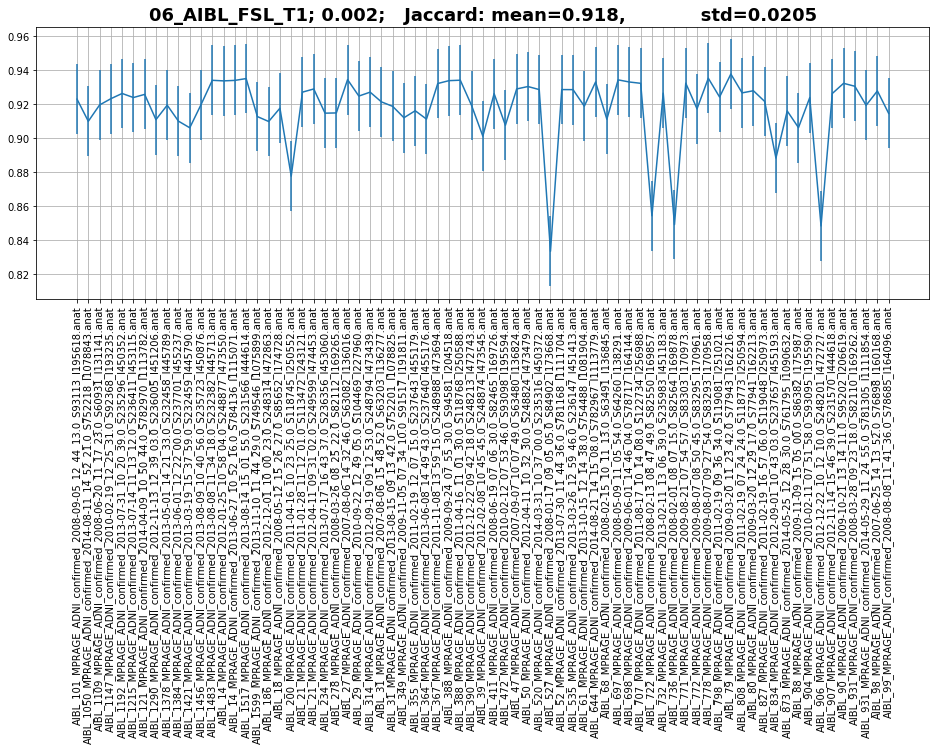

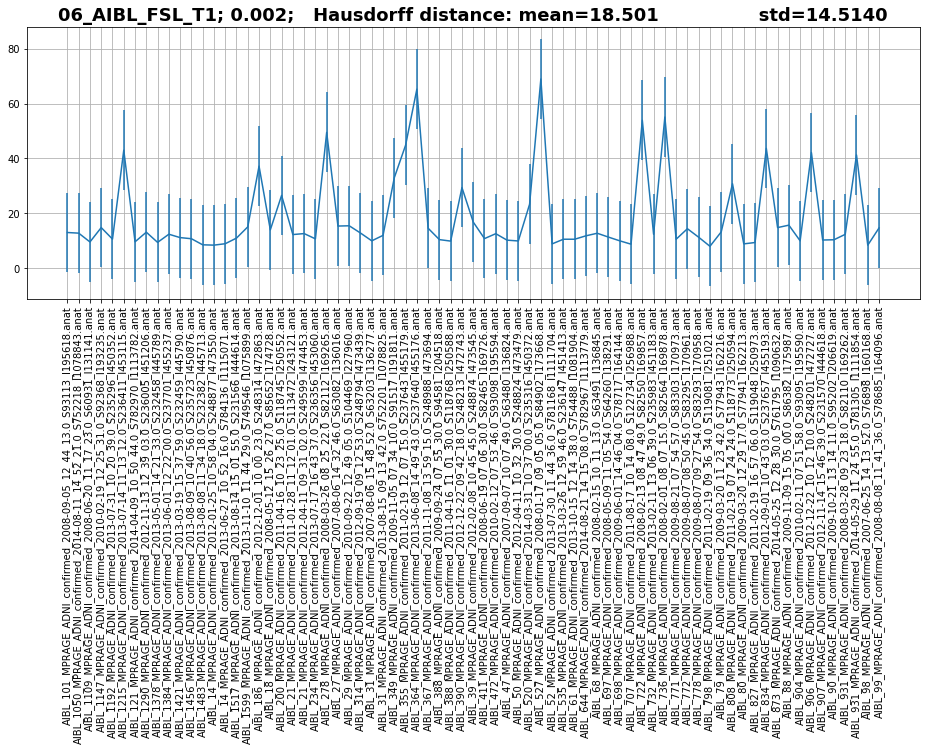

In [29]:
stat6 = plot_stats(experiments.loc[5])

In [31]:
pd.concat([stat1, stat2, stat3], axis=0)

dice  hausdorff_distance   jaccard      lr
mean  0.937573           25.434301  0.883463  0.0010
std   0.025043           13.979167  0.042213  0.0010
mean  0.953677           23.424776  0.911574  0.0015
std   0.008337           14.955689  0.015056  0.0015
mean  0.940755           33.176858  0.888550  0.0020
std   0.015880           19.076095  0.027890  0.0020

In [32]:
pd.concat([stat4, stat5, stat6])

dice  hausdorff_distance   jaccard      lr
mean  0.957730           16.401596  0.919172  0.0010
std   0.013020           11.994269  0.022971  0.0010
mean  0.948222           41.253381  0.902524  0.0015
std   0.024689           10.248695  0.042431  0.0015
mean  0.957147           18.501298  0.918039  0.0020
std   0.011476           14.514000  0.020541  0.0020